### Wine Classification Assignment

#### Srushti Sali

### Linear Discriminant Analysis

In [1]:
from sklearn import datasets
wine = datasets.load_wine()

In [2]:
from sklearn.model_selection import train_test_split
X = wine.data
Y = wine.target
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state = 123456)

In [3]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()

In [4]:
X_lda = lda.fit(X_train, Y_train)
Y_pred1 = lda.predict(X_test)
Y_pred1

array([0, 0, 1, 1, 2, 2, 1, 1, 2, 0, 2, 1, 1, 1, 0, 1, 1, 0, 1, 2, 1, 0,
       1, 2, 1, 1, 0, 1, 0, 0, 2, 1, 0, 1, 0, 2, 2, 1, 1, 2, 1, 0, 1, 0,
       0, 1, 2, 2, 2, 2, 0, 1, 2, 1, 0, 0, 0, 2, 0])

In [5]:
from sklearn.metrics import accuracy_score
acc1 = accuracy_score(Y_test, Y_pred1)
acc1

0.9830508474576272

### KNN Method

In [6]:
import pandas as pd
X_wineDF = pd.DataFrame(wine.data, columns = wine.feature_names)
Y_wineDF = pd.Categorical.from_codes(wine.target, wine.target_names)
wineDF = X_wineDF.join(pd.Series(Y_wineDF, name = 'Class'))
wineDF.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,Class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,class_0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,class_0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,class_0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,class_0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,class_0


In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [8]:
param_grid = {'n_neighbors':range(1,30)}
GS = GridSearchCV(KNeighborsClassifier(), param_grid, scoring = 'accuracy')
GS.fit(X_train, Y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 30)}, scoring='accuracy')

In [9]:
GS.best_params_

{'n_neighbors': 16}

In [10]:
GS.best_score_

0.7221014492753624

In [11]:
from sklearn.metrics import accuracy_score
KNNClassifier = KNeighborsClassifier(n_neighbors=16)
KNNClassifier.fit(X_train, Y_train)
Y_pred2 = KNNClassifier.predict(X_test)
acc2 = accuracy_score(Y_test, Y_pred2)
acc2

0.7627118644067796

### Multiclass Logistic Regression

In [12]:
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
scaler = preprocessing.StandardScaler().fit(X_train)
X_scaledtrain = scaler.transform(X_train)
X_scaledtest = scaler.transform(X_test)
mlgr = LogisticRegression(multi_class='auto')
mlgr.fit(X_scaledtrain, Y_train)

LogisticRegression()

In [13]:
Y_pred3 = mlgr.predict(X_scaledtest)
Y_pred3

array([0, 0, 1, 1, 2, 2, 1, 1, 2, 0, 2, 1, 1, 1, 0, 1, 1, 0, 1, 2, 1, 0,
       1, 2, 1, 1, 0, 1, 0, 0, 2, 1, 0, 1, 0, 2, 2, 1, 1, 2, 1, 0, 1, 0,
       0, 1, 2, 2, 2, 2, 0, 1, 2, 1, 0, 0, 0, 2, 0])

In [14]:
acc3 = accuracy_score(Y_test, Y_pred3)
acc3

0.9830508474576272

In [15]:
X_train.shape, X_test.shape

((119, 13), (59, 13))

### Decision Tree

[Text(0.5416666666666666, 0.875, 'X[12] <= 755.0\ngini = 0.656\nsamples = 119\nvalue = [40, 48, 31]'),
 Text(0.3333333333333333, 0.625, 'X[6] <= 0.975\ngini = 0.506\nsamples = 75\nvalue = [2, 44, 29]'),
 Text(0.16666666666666666, 0.375, 'X[8] <= 0.485\ngini = 0.077\nsamples = 25\nvalue = [0, 1, 24]'),
 Text(0.08333333333333333, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.25, 0.125, 'gini = 0.0\nsamples = 24\nvalue = [0, 0, 24]'),
 Text(0.5, 0.375, 'X[10] <= 0.65\ngini = 0.249\nsamples = 50\nvalue = [2, 43, 5]'),
 Text(0.4166666666666667, 0.125, 'gini = 0.0\nsamples = 5\nvalue = [0, 0, 5]'),
 Text(0.5833333333333334, 0.125, 'gini = 0.085\nsamples = 45\nvalue = [2, 43, 0]'),
 Text(0.75, 0.625, 'X[9] <= 3.435\ngini = 0.244\nsamples = 44\nvalue = [38, 4, 2]'),
 Text(0.6666666666666666, 0.375, 'gini = 0.0\nsamples = 4\nvalue = [0, 4, 0]'),
 Text(0.8333333333333334, 0.375, 'X[5] <= 1.925\ngini = 0.095\nsamples = 40\nvalue = [38, 0, 2]'),
 Text(0.75, 0.125, 'gini = 0.0\nsamp

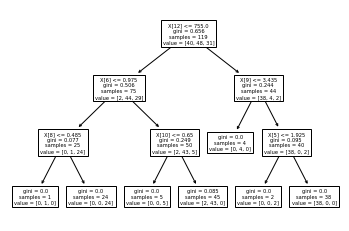

In [16]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets, tree   # The tree module contains Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

DT = DecisionTreeClassifier(max_depth=3)
DT.fit(X_train, Y_train)
tree.plot_tree(DT)

In [17]:
Y_pred4 = DT.predict(X_test)
acc4 = accuracy_score(Y_pred4, Y_test)
acc4

0.9322033898305084

In [18]:
max(acc1, acc2, acc3, acc4)

0.9830508474576272

***The maximum accuray is obtained in the Linear Discriminant Analysis Approach.***

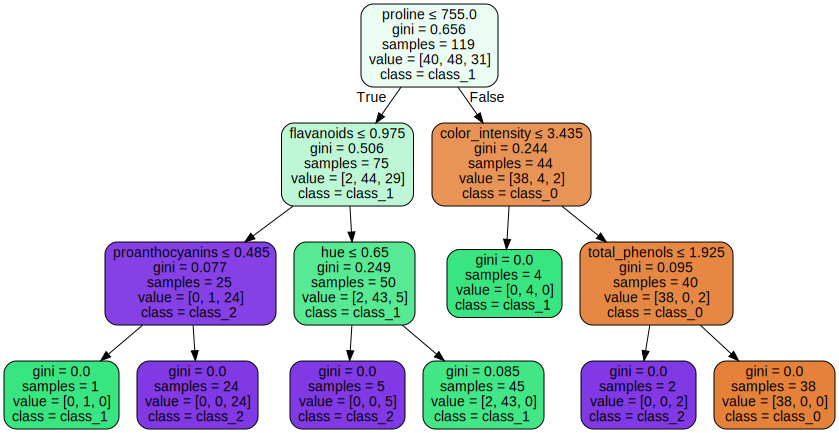

In [19]:
import graphviz 
dot_data = tree.export_graphviz(DT, out_file=None, 
                         feature_names=wine.feature_names,  
                         class_names=wine.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True) 
graph = graphviz.Source(dot_data) 
graph